In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ayank_hyn0aug\OneDrive\Desktop\equipment_monitoring\equipment_anomaly_data.csv")

In [53]:
df['faulty'].value_counts()

faulty
0    6905
1     767
Name: count, dtype: int64

In [54]:
df_equip_counts = df['equipment'].value_counts()
print(df_equip_counts)

equipment
Compressor    2573
Turbine       2565
Pump          2534
Name: count, dtype: int64


Visualising the data

In [3]:
df.head()

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   location     7672 non-null   object 
 6   faulty       7672 non-null   float64
dtypes: float64(5), object(2)
memory usage: 419.7+ KB


In [5]:
df.describe()

,temperature,pressure,vibration,humidity,faulty
count,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000
mean,70.922478,35.738048,1.611809,50.016574,0.099974
std,16.200059,10.381593,0.728560,11.841479,0.299985
min,10.269385,3.620798,-0.428188,10.215077,0.000000
25%,62.777057,29.485682,1.170906,42.612817,0.000000
50%,70.156900,35.227544,1.533113,50.024744,0.000000
75%,77.568387,41.159913,1.924700,57.340513,0.000000
max,149.690420,79.887734,4.990537,89.984718,1.000000


In [6]:
df['equipment'].unique()

array(['Turbine', 'Compressor', 'Pump'], dtype=object)

In [7]:
df['faulty'] = df['faulty'].astype(int)

In [8]:
df['faulty'].value_counts()

faulty
0    6905
1     767
Name: count, dtype: int64

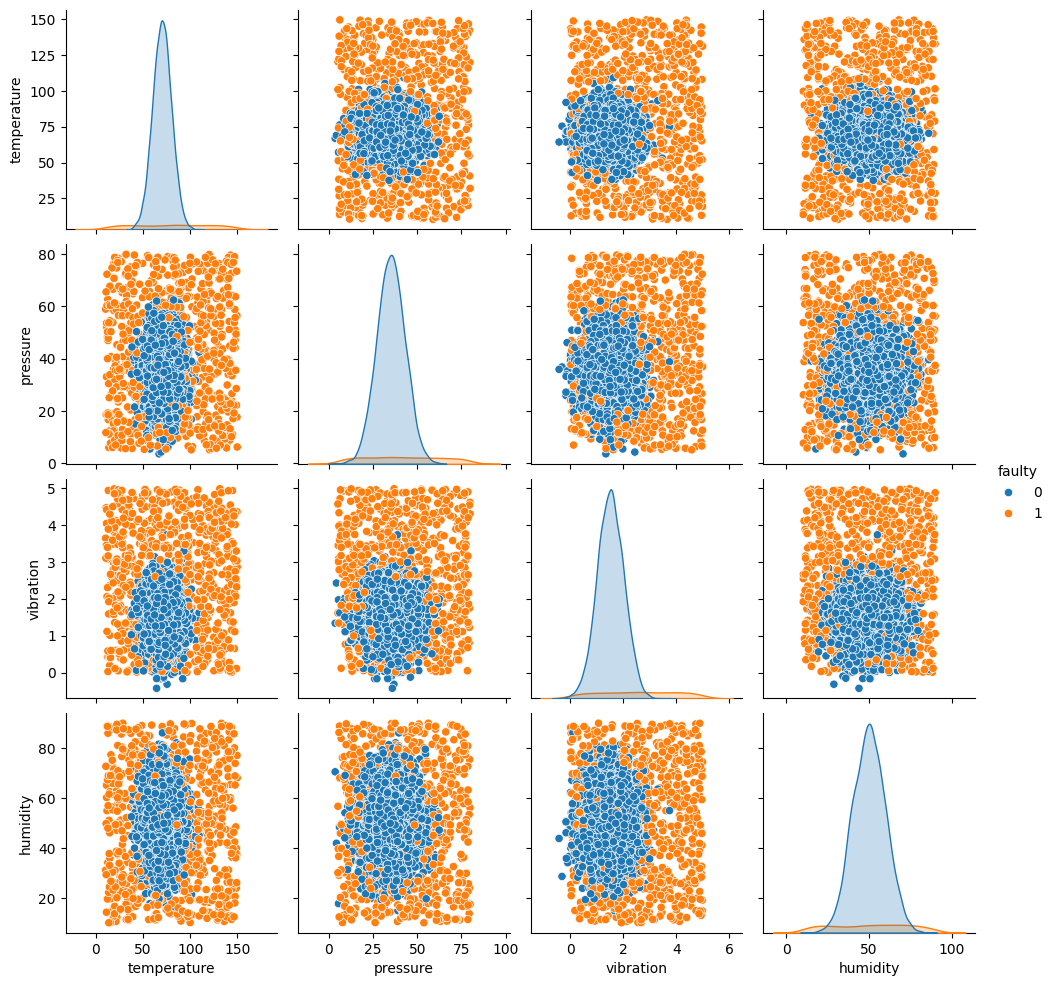

In [9]:
sns.pairplot(df,hue='faulty')

C:\Users\ayank_hyn0aug\AppData\Local\Temp\ipykernel_48120\169487779.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df,x='temperature',hue='faulty',shade=True)


<Axes: xlabel='temperature', ylabel='Density'>

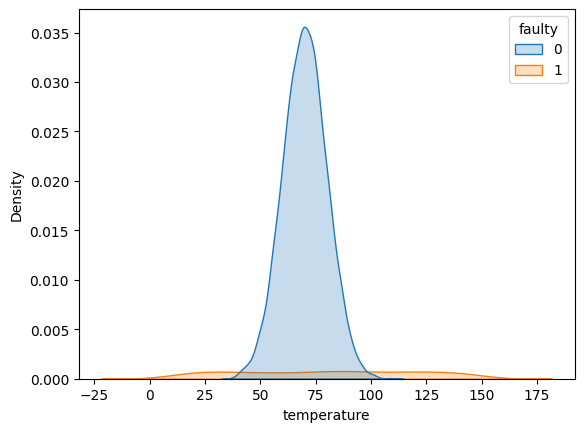

In [10]:
sns.kdeplot(df,x='temperature',hue='faulty',shade=True)

C:\Users\ayank_hyn0aug\AppData\Local\Temp\ipykernel_48120\84897775.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df,x='pressure',hue='faulty',shade=True)


<Axes: xlabel='pressure', ylabel='Density'>

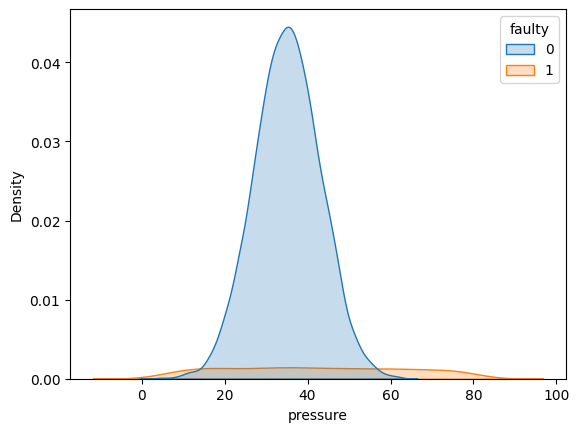

In [11]:
sns.kdeplot(df,x='pressure',hue='faulty',shade=True)

C:\Users\ayank_hyn0aug\AppData\Local\Temp\ipykernel_48120\2811535213.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df,x='humidity',hue='faulty',shade=True)


<Axes: xlabel='humidity', ylabel='Density'>

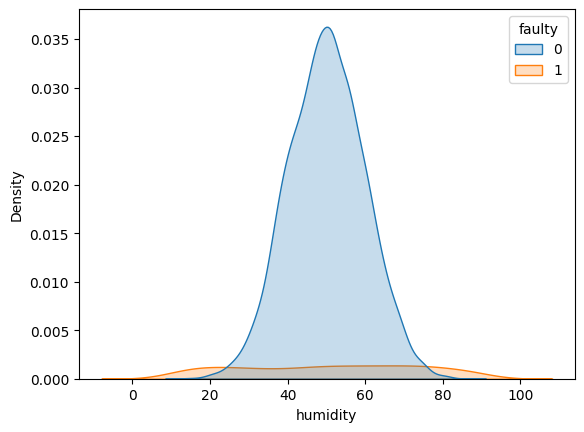

In [12]:
sns.kdeplot(df,x='humidity',hue='faulty',shade=True)

<Axes: xlabel='location', ylabel='count'>

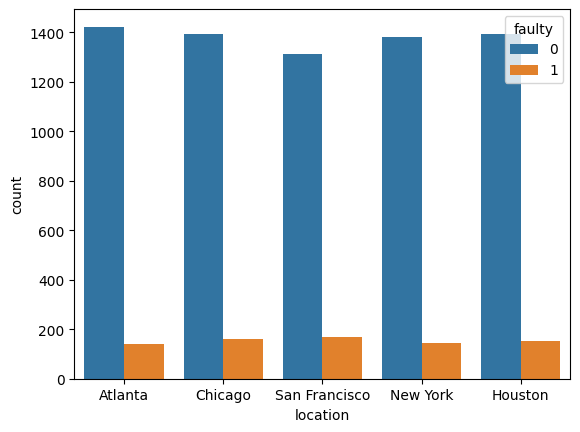

In [13]:
sns.countplot(data=df,x='location',hue='faulty')

Dealing with missing values

In [14]:
df.isnull().sum()

temperature    0
pressure       0
vibration      0
humidity       0
equipment      0
location       0
faulty         0
dtype: int64

In [15]:
df['location'].unique()

array(['Atlanta', 'Chicago', 'San Francisco', 'New York', 'Houston'],
      dtype=object)

In [16]:
df['faulty'].value_counts() # This data is imbalanced

faulty
0    6905
1     767
Name: count, dtype: int64

Removing the outliers

<Axes: >

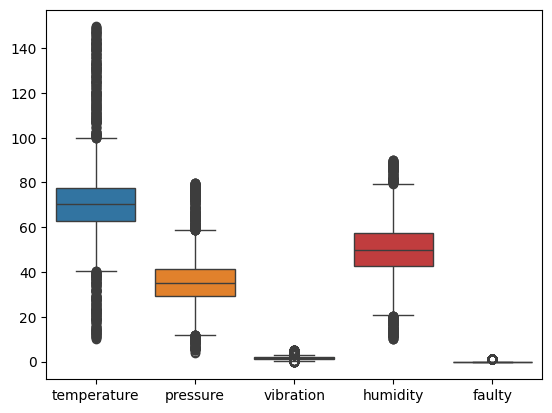

In [17]:
sns.boxplot(df)

In [18]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [19]:
cols = ["temperature", "pressure", "vibration", "humidity"]
filtered_df = remove_outliers_iqr(df,cols)

<Axes: >

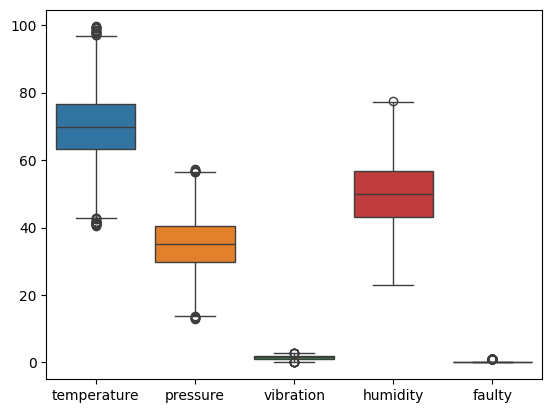

In [20]:
sns.boxplot(filtered_df)

In [21]:
filtered_df['faulty'].value_counts()

faulty
0    6767
1      86
Name: count, dtype: int64

Encoding the categorical values

In [22]:
df_encoded = filtered_df.copy()
categorical_cols = ["equipment", "location"]
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols)

In [23]:
df_encoded

,temperature,pressure,vibration,humidity,faulty,equipment_Compressor,equipment_Pump,equipment_Turbine,location_Atlanta,location_Chicago,location_Houston,location_New York,location_San Francisco
0,58.180180,25.029278,0.606516,45.694907,0,False,False,True,True,False,False,False,False
1,75.740712,22.954018,2.338095,41.867407,0,True,False,False,False,True,False,False,False
2,71.358594,27.276830,1.389198,58.954409,0,False,False,True,False,False,False,False,True
3,71.616985,32.242921,1.770690,40.565138,0,False,True,False,True,False,False,False,False
4,66.506832,45.197471,0.345398,43.253795,0,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665,62.179965,36.422638,1.565271,51.606218,0,False,False,True,True,False,False,False,False
7666,69.587073,45.760937,1.269738,60.915675,0,True,False,False,False,False,True,False,False
7667,65.711521,37.505934,2.030521,49.331471,0,False,True,False,False,False,False,True,False
7668,63.005855,45.164234,1.264585,61.905390,0,False,True,False,False,False,False,True,False


In [24]:
X = df_encoded.drop('faulty',axis=1)

In [25]:
y = df_encoded['faulty']

In [26]:
X

,temperature,pressure,vibration,humidity,equipment_Compressor,equipment_Pump,equipment_Turbine,location_Atlanta,location_Chicago,location_Houston,location_New York,location_San Francisco
0,58.180180,25.029278,0.606516,45.694907,False,False,True,True,False,False,False,False
1,75.740712,22.954018,2.338095,41.867407,True,False,False,False,True,False,False,False
2,71.358594,27.276830,1.389198,58.954409,False,False,True,False,False,False,False,True
3,71.616985,32.242921,1.770690,40.565138,False,True,False,True,False,False,False,False
4,66.506832,45.197471,0.345398,43.253795,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7665,62.179965,36.422638,1.565271,51.606218,False,False,True,True,False,False,False,False
7666,69.587073,45.760937,1.269738,60.915675,True,False,False,False,False,True,False,False
7667,65.711521,37.505934,2.030521,49.331471,False,True,False,False,False,False,True,False
7668,63.005855,45.164234,1.264585,61.905390,False,True,False,False,False,False,True,False


In [27]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7665    0
7666    0
7667    0
7668    0
7669    0
Name: faulty, Length: 6853, dtype: int64

In [28]:
y.value_counts()

faulty
0    6767
1      86
Name: count, dtype: int64

Oversampling the data

In [29]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [30]:
X_resampled.to_csv("X_resampled.csv",index=False)
y_resampled.to_csv("y_resampled.csv",index=False)

In [31]:
len(X_resampled)

13534

In [32]:
len(y_resampled)

13534

In [33]:
y_resampled.value_counts()

faulty
0    6767
1    6767
Name: count, dtype: int64

Train-test split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [36]:
len(X_train)

10827

In [37]:
len(X_test)

1354

Scaling the data

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [39]:
scaler = StandardScaler()

In [40]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [41]:
scaled_X_train[0]

array([-1.82146495, -1.93055576, -0.84103775,  0.79422891,  1.29255391,
       -0.9561644 ,  1.08799974, -0.62667322,  1.57772114, -0.6341119 ,
        1.76277044, -0.65118595])

In [42]:
scaled_X_test[0]

array([ 0.73078558, -0.93729739, -1.26640301,  0.5118141 , -0.77366212,
        1.04584526,  1.08799974, -0.62667322, -0.63382557,  1.57700873,
       -0.56728884,  1.53565967])

Applying KNN algorithm

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': range(1, 10),  # Testing k from 1 to 20
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(scaled_X_train, y_train)

# Get best parameters
best_k = grid_search.best_params_['n_neighbors']
best_weight = grid_search.best_params_['weights']
best_metric = grid_search.best_params_['metric']
print(f"Best KNN Parameters: k={best_k}, weights={best_weight}, metric={best_metric}")

Best KNN Parameters: k=2, weights=uniform, metric=manhattan


In [45]:
val_error_rates = []
for k in range(1,10) :
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    y_pred_val = knn_model.predict(scaled_X_val)
    val_error = accuracy_score(y_val,y_pred_val)
    val_error_rates.append(val_error)

In [46]:
val_error_rates

[0.9933481152993349,
 0.9933481152993349,
 0.9933481152993349,
 0.9933481152993349,
 0.9933481152993349,
 0.9933481152993349,
 0.991869918699187,
 0.9903917220990391,
 0.9896526237989652]

Elbow method for selecting k

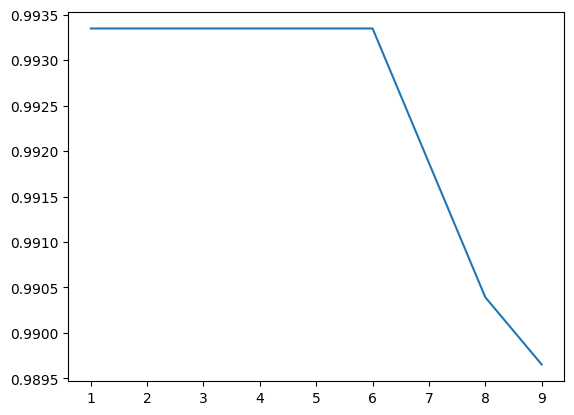

In [47]:
plt.plot(range(1,10),val_error_rates)

Choosing k = 2

In [48]:
knn_model = KNeighborsClassifier(n_neighbors=2)

In [49]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [50]:
y_acc_pred = knn_model.predict(scaled_X_train)

In [51]:
accuracy_score(y_train, y_acc_pred)

0.9956590006465318

Analyzing the result

In [50]:
y_pred = knn_model.predict(scaled_X_val)

In [51]:
accuracy_score(y_val, y_pred)

0.9933481152993349

In [52]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       677
           1       0.99      1.00      0.99       676

    accuracy                           0.99      1353
   macro avg       0.99      0.99      0.99      1353
weighted avg       0.99      0.99      0.99      1353



In [53]:
confusion_matrix(y_val,y_pred)

array([[671,   6],
       [  3, 673]])

In [56]:
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(scaled_X_train)
print('Train Set Evaluation:')
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))
print('Test Accuracy:', accuracy_score(y_train, y_train_pred))

Train Set Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5413
           1       1.00      0.99      1.00      5414

    accuracy                           1.00     10827
   macro avg       1.00      1.00      1.00     10827
weighted avg       1.00      1.00      1.00     10827

[[5413    0]
 [  39 5375]]
Test Accuracy: 0.9963978941535051


In [54]:
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(scaled_X_test)
print('Test Set Evaluation:')
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       677
           1       0.99      0.99      0.99       677

    accuracy                           0.99      1354
   macro avg       0.99      0.99      0.99      1354
weighted avg       0.99      0.99      0.99      1354

[[672   5]
 [  6 671]]
Test Accuracy: 0.9918759231905465


In [55]:
# Bagging, Boosting (Xgboost, Catboost, LGBM), Stacked Ensemble DATASET	6 Overview	6 Focus	6 DATA INSPECTION	8 Steps Taken	8 Descriptive Statistics Analysis	8 Key Findings	9 Conclusion	10 FEATURE ENGINEERING TRAIN VALIDATION TEST SPLIT Machine learning Models